In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the uploaded CSV file
file_path = 'pizza_v2.csv'
pizza_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
pizza_data.head(), pizza_data.info(), pizza_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


(  company price_rupiah diameter      topping           variant     size  \
 0       A    Rp235,000  22 inch      chicken  double_signature    jumbo   
 1       A    Rp198,000  20 inch    papperoni  double_signature    jumbo   
 2       A    Rp120,000  16 inch    mushrooms  double_signature  reguler   
 3       A    Rp155,000  14 inch  smoked_beef  double_signature  reguler   
 4       A    Rp248,000  18 inch   mozzarella  double_signature    jumbo   
 
   extra_sauce extra_cheese extra_mushrooms  
 0         yes          yes              no  
 1         yes          yes              no  
 2         yes          yes             yes  
 3         yes           no             yes  
 4         yes           no             yes  ,
 None,
        company price_rupiah diameter  topping  variant    size extra_sauce  \
 count      129          129      129      129      129     129         129   
 unique       5           43       12       12       20       6           2   
 top          C     R

In [5]:
# Data Cleaning
# Convert price_rupiah to numeric by removing "Rp" and commas
pizza_data['price_rupiah'] = pizza_data['price_rupiah'].str.replace("Rp", "").str.replace(",", "").astype(float)

# Convert diameter to numeric by removing "inch"
pizza_data['diameter'] = pizza_data['diameter'].str.replace(" inch", "").astype(float)

In [7]:
# Convert binary columns (yes/no) to 1/0
binary_columns = ['extra_sauce', 'extra_cheese', 'extra_mushrooms']
for col in binary_columns:
    pizza_data[col] = pizza_data[col].map({'yes': 1, 'no': 0})

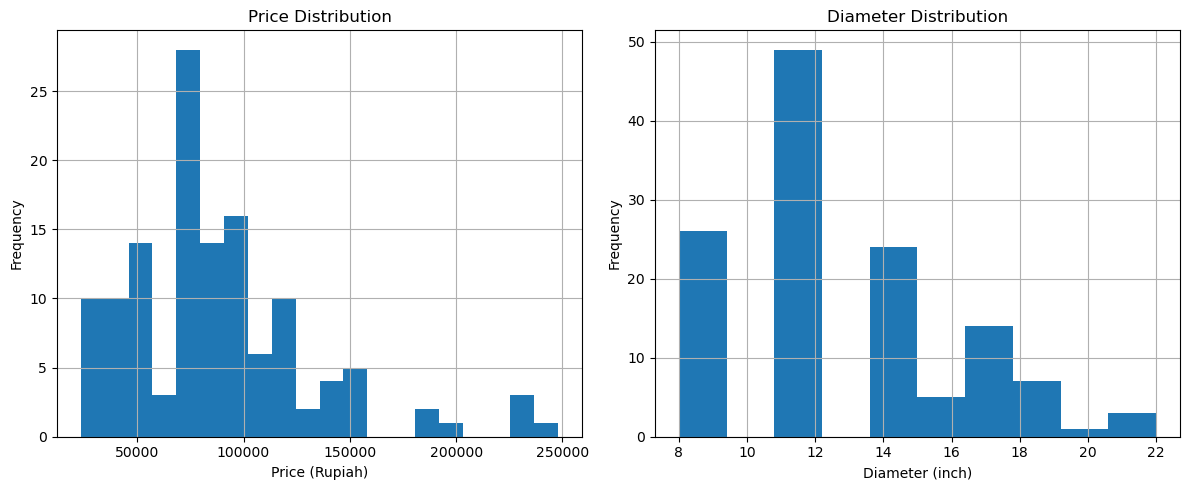

In [9]:
# EDA: Check distributions of key columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pizza_data['price_rupiah'].hist(bins=20, ax=axs[0])
axs[0].set_title('Price Distribution')
axs[0].set_xlabel('Price (Rupiah)')
axs[0].set_ylabel('Frequency')

pizza_data['diameter'].hist(bins=10, ax=axs[1])
axs[1].set_title('Diameter Distribution')
axs[1].set_xlabel('Diameter (inch)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
# Encoding categorical variables
categorical_columns = ['company', 'topping', 'variant', 'size']
pizza_data_encoded = pd.get_dummies(pizza_data, columns=categorical_columns, drop_first=True)
pizza_data_encoded

,price_rupiah,diameter,extra_sauce,extra_cheese,extra_mushrooms,company_B,company_C,company_D,company_E,topping_black_papper,...,variant_new_york,variant_spicy tuna,variant_spicy_tuna,variant_super_supreme,variant_thai_veggie,size_jumbo,size_large,size_medium,size_reguler,size_small
0,235000.0,22.0,1,1,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,198000.0,20.0,1,1,0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,120000.0,16.0,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,155000.0,14.0,1,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,248000.0,18.0,1,0,1,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,39000.0,8.5,1,1,1,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
125,72000.0,12.0,1,1,1,False,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
126,99000.0,14.0,1,1,1,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
127,44000.0,8.5,1,0,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
# Splitting the data
X = pizza_data_encoded.drop('price_rupiah', axis=1)
y = pizza_data_encoded['price_rupiah']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Model: Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [19]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(274410933.65384614, 0.9023823907163655)

In [21]:
import numpy as np

def predict_pizza_price(company, diameter, topping, variant, size, extra_sauce, extra_cheese, extra_mushrooms):
    # Create a dictionary for encoding input values
    input_data = {
        'diameter': diameter,
        'extra_sauce': 1 if extra_sauce.lower() == 'yes' else 0,
        'extra_cheese': 1 if extra_cheese.lower() == 'yes' else 0,
        'extra_mushrooms': 1 if extra_mushrooms.lower() == 'yes' else 0
    }

    # Process categorical variables for encoding
    for col in categorical_columns:
        for unique_val in pizza_data[col].unique():
            col_name = f"{col}_{unique_val}"
            input_data[col_name] = 1 if (unique_val == eval(col)) else 0

    # Create a dataframe for the new input
    input_df = pd.DataFrame([input_data])

    # Align input with training features (fill missing columns with 0)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

    # Scale the input features
    scaled_input = scaler.transform(input_df)

    # Predict the price
    predicted_price = model.predict(scaled_input)

    return round(predicted_price[0], 2)

# Get user input
company = input("Enter the pizza company (e.g., A, B, C): ")
diameter = float(input("Enter the diameter of the pizza (in inches): "))
topping = input("Enter the topping (e.g., chicken, pepperoni): ")
variant = input("Enter the variant (e.g., classic, double_signature): ")
size = input("Enter the size (e.g., jumbo, regular, medium): ")
extra_sauce = input("Extra sauce? (yes/no): ")
extra_cheese = input("Extra cheese? (yes/no): ")
extra_mushrooms = input("Extra mushrooms? (yes/no): ")

# Predict the price
predicted_price = predict_pizza_price(
    company, diameter, topping, variant, size, extra_sauce, extra_cheese, extra_mushrooms
)

print(f"The predicted price for the pizza is: Rp{predicted_price}")


Enter the pizza company (e.g., A, B, C):  A
Enter the diameter of the pizza (in inches):  14
Enter the topping (e.g., chicken, pepperoni):  chicken
Enter the variant (e.g., classic, double_signature):  classic
Enter the size (e.g., jumbo, regular, medium):  small
Extra sauce? (yes/no):  yes
Extra cheese? (yes/no):  yes
Extra mushrooms? (yes/no):  no


The predicted price for the pizza is: Rp59075.0
